# `classification.XGBoostClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [18]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'auc', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is wrapper using XGBoost classifier to train a XGBoost [1]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  metrics : str, optional
 |      Metrics to be tracked at fitting time with possible values of "auc", "aucpr", "error",
 |      "logloss". Note this is different than `eval_metric` that n

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    metrics="logloss",
    params=params,
)
clf.fit(X_train, y_train)

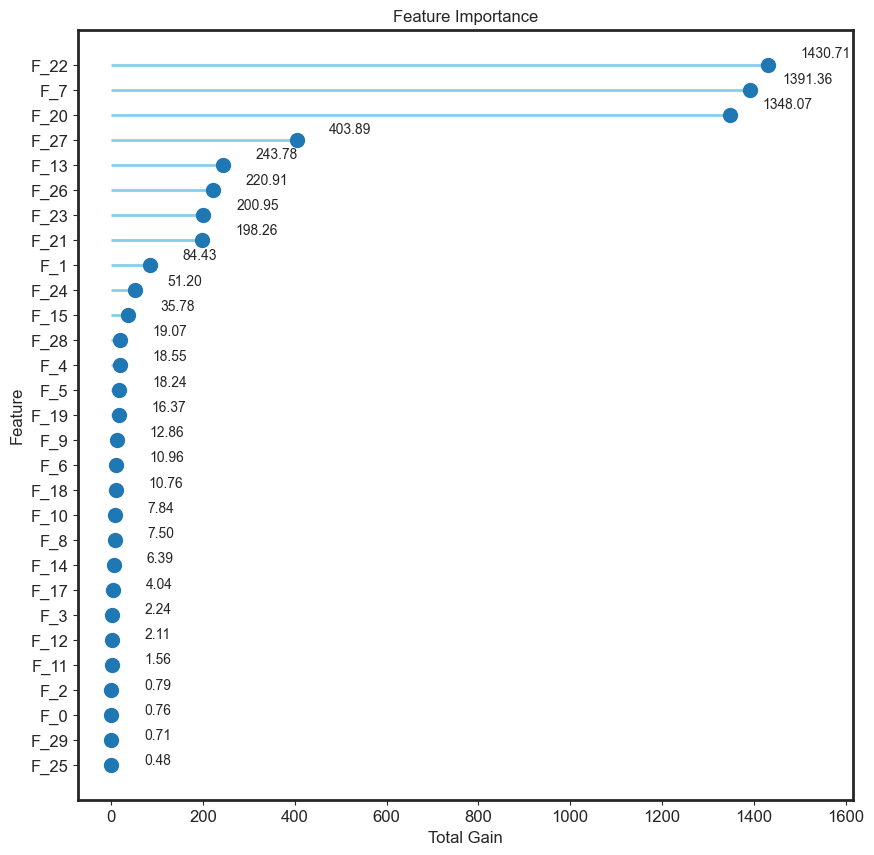

In [6]:
clf.plot_feature_importance(figsize=(10, 10))

In [7]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([4.8674658e-01, 9.9921560e-01, 5.3982914e-04, 6.6288380e-04,
       3.4264926e-02, 9.9900335e-01, 4.2203325e-03, 9.3833689e-04,
       8.3133137e-01, 9.9964285e-01], dtype=float32)

In [8]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

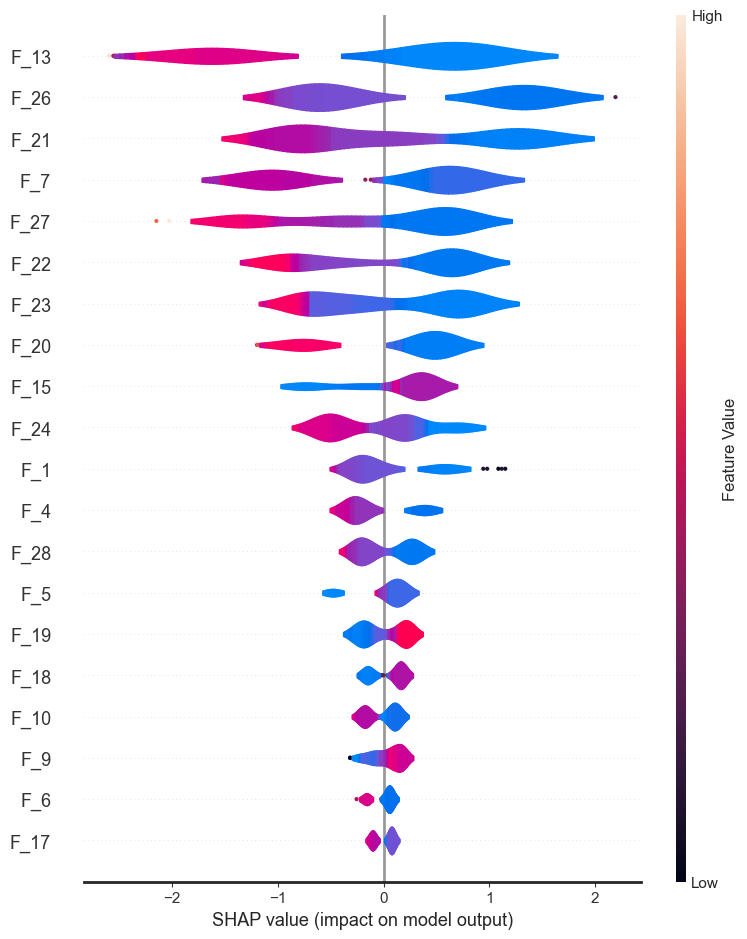

In [9]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

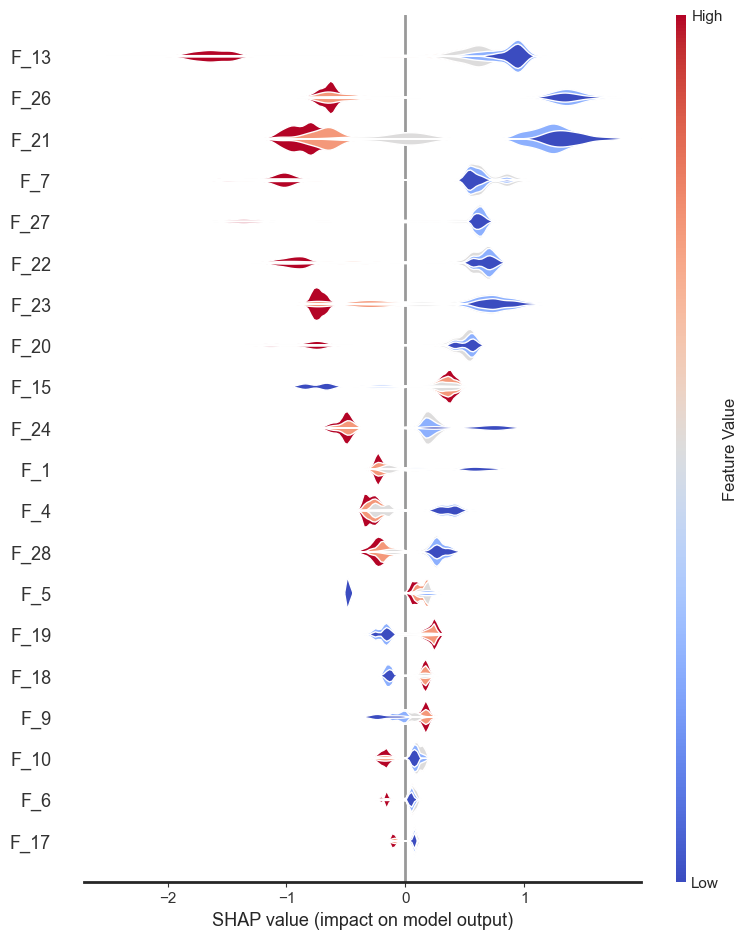

In [10]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

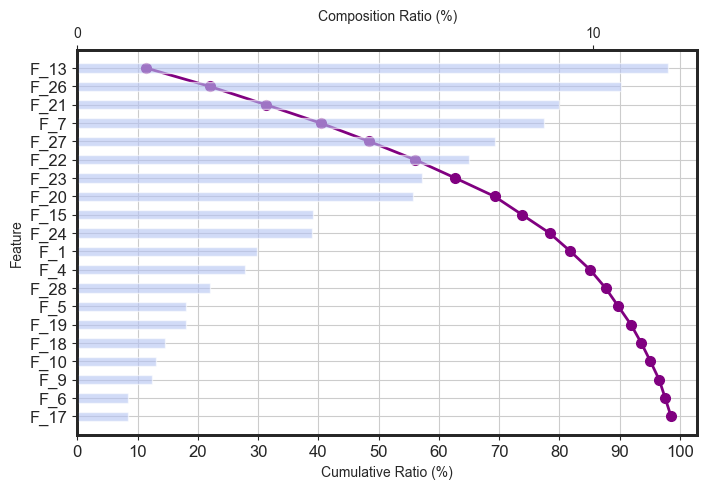

In [11]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [12]:
clf.shap_values_test_[:10]

array([[-4.97399596e-03, -2.76020169e-01, -2.93291290e-03,
        -1.03225932e-02, -2.29084253e-01, -4.88697708e-01,
         3.01549211e-02,  3.35109681e-01, -1.05875172e-02,
        -1.95533067e-01, -2.48099744e-01,  2.27620434e-02,
        -3.50120105e-02, -2.59312391e+00,  5.89503581e-03,
        -8.15528691e-01,  0.00000000e+00, -1.21572055e-01,
        -1.69155985e-01, -1.56331986e-01,  5.00052273e-01,
        -9.13954601e-02,  5.99599898e-01,  1.15634590e-01,
         7.69970298e-01,  5.18444646e-03,  1.25798368e+00,
         6.21639609e-01,  2.50624180e-01,  1.16344867e-02],
       [ 3.32670263e-03,  7.36014545e-01,  4.72279359e-03,
         1.25878360e-02, -5.78611791e-02, -4.77461964e-01,
         5.17403223e-02,  5.45937121e-01, -1.57081392e-02,
        -1.39302656e-01,  1.51816204e-01,  4.43761572e-02,
        -9.40050464e-03,  7.68799543e-01,  1.36492578e-02,
        -1.26704544e-01,  0.00000000e+00,  7.46035725e-02,
        -1.23461962e-01, -1.19642794e-01,  3.93730491e-

In [13]:
clf.shap_values_train_[:10]

array([[-4.97399596e-03, -2.13298261e-01, -1.14600202e-02,
        -2.59630624e-02, -2.74446726e-01,  8.92616585e-02,
         1.52433291e-02, -1.02768183e+00, -1.54092172e-02,
        -1.21356785e-01, -1.37605131e-01, -3.33363265e-02,
         1.64774433e-02, -1.67278540e+00, -1.95537284e-02,
         2.19940603e-01,  0.00000000e+00,  8.18782672e-02,
        -1.34005412e-01, -2.45672286e-01, -7.47701168e-01,
        -5.15124574e-02, -9.92039204e-01, -7.28940070e-01,
        -4.95391130e-01, -1.41176805e-02, -6.80531740e-01,
        -1.34411526e+00, -1.12585917e-01, -1.18754413e-02],
       [ 3.32670263e-03, -1.66608363e-01,  1.84537768e-02,
         7.84619339e-03, -2.84273893e-01,  1.83624402e-01,
         5.66951856e-02,  6.06769264e-01, -1.23162847e-03,
        -5.30595481e-02,  1.24189220e-01,  5.42106330e-02,
        -1.96159724e-03,  6.00287735e-01,  2.57736444e-02,
        -8.42638075e-01,  0.00000000e+00,  5.96691035e-02,
         2.00228661e-01, -1.76918358e-01,  5.88693261e-

In [14]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,1430.709473
1,F_7,1391.363770
2,F_20,1348.067749
3,F_27,403.890747
4,F_13,243.782745
5,F_26,220.909576
6,F_23,200.947388
7,F_21,198.257645
8,F_1,84.434021
9,F_24,51.201881


In [15]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [16]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.965000,0.966000,0.996000,0.998000,0.981000,0.963000,0.998000,0.972000,0.966000,0.977000,0.945000,103,62,2,4


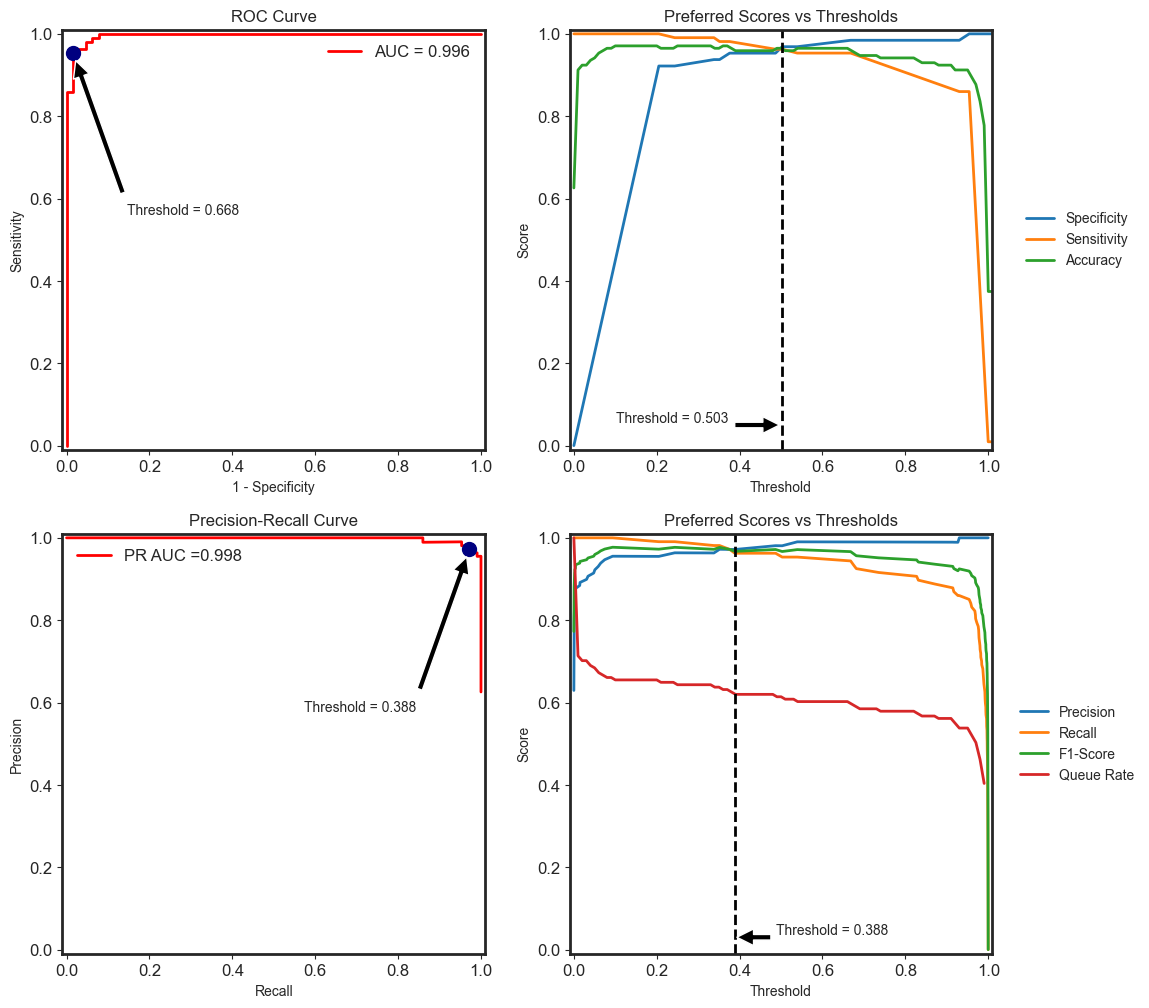

In [17]:
metrics.plot()